In [18]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import pandas as pd
import numpy as np


In [20]:
df = pd.read_csv('NVDA.csv', index_col='Date', parse_dates=True)
df = df.dropna()
print('Shape of data', df.shape)
df.head()


Shape of data (5978, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376518,271468800
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415963,51048000
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383690,34320000
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382495,24436800
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381300,22752000


In [21]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag='AIC')
  print("1.ADF :", dftest[0])
  print("2.P-Value :", dftest[1])
  print("3. Num Of Lags :", dftest[2])
  print("4. Num of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key,val in dftest[4].items():
    print("\t",key,": ", val)


In [22]:
ad_test(df['Close'])

1.ADF : -0.9253823389740806
2.P-Value : 0.7794987803220566
3. Num Of Lags : 32
4. Num of Observations Used For ADF Regression and Critical Values Calculation : 5945
5. Critical Values :
	 1% :  -3.4314504416815286
	 5% :  -2.8620262932427285
	 10% :  -2.5670288515555755


In [23]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [24]:
stepwise_fit = auto_arima(df['Close'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25862.282, Time=12.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25909.454, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25897.743, Time=0.70 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25897.005, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25908.033, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25877.057, Time=6.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25876.110, Time=4.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=25872.893, Time=6.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=25871.557, Time=7.60 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25897.452, Time=1.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=25883.434, Time=3.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=25877.483, Time=3.56 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25856.623, Time=14.62 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=25835.189, Time=12.36 sec
 ARIMA(4,1,2)(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5978
Model:               SARIMAX(4, 1, 4)   Log Likelihood              -12901.706
Date:                Sat, 22 Oct 2022   AIC                          25821.411
Time:                        17:41:04   BIC                          25881.672
Sample:                             0   HQIC                         25842.342
                               - 5978                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6718      0.013    -50.499      0.000      -0.698      -0.646
ar.L2          0.0993      0.010      9.844      0.000       0.080       0.119
ar.L3         -0.6903      0.008    -90.247      0.000      -0.705      -0.675
ar.L4         -0.8180      0.012    -70.567      0.000      -0.841      -0.795
ma.L1          0.6243      0.014     43.090      0.000       0.596       0.653
ma.L2         -0.1596      0.010    -15.609      0.000      -0.180      -0.140
ma.L3          0.6833      0.008     84.059      0.000       0.667       0.699
ma.L4          0.7907      0.013     60.628      0.000       0.765       0.816
sigma2         4.4317      0.018    253.149      0.000       4.397       4.466
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            462848.66
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):            1056.80   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
train = df.iloc[:-30]
test = df.iloc[-30:]


In [39]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train['Close'], order=(4,1,4))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 5948
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -12765.089
Date:                Sat, 22 Oct 2022   AIC                          25548.177
Time:                        17:47:11   BIC                          25608.393
Sample:                             0   HQIC                         25569.098
                               - 5948                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0579      0.002    -35.432      0.000      -0.061      -0.055
ar.L2         -0.0256      0.001    -17.276      0.000      -0.028      -0.023
ar.L3         -0.0428      0.002    -23.623      0.000      -0.046      -0.039
ar.L4         -0.9824      0.001   -663.296      0.000      -0.985      -0.980
ma.L1          0.0492      0.002     24.989      0.000       0.045       0.053
ma.L2          0.0008      0.002      0.438      0.661      -0.003       0.004
ma.L3          0.0536      0.002     26.747      0.000       0.050       0.058
ma.L4          0.9848      0.002    538.109      0.000       0.981       0.988
sigma2         4.2745      0.018    237.859      0.000       4.239       4.310
===================================================================================
Ljung-Box (L1) (Q):                   6.90   Jarque-Bera (JB):            493801.47
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):            1014.19   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        47.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, type='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2022-09-12    145.717458
2022-09-13    144.267266
2022-09-14    145.154134
2022-09-15    145.850047
2022-09-16    144.034075
2022-09-19    145.508151
2022-09-20    144.568260
2022-09-21    143.978899
2022-09-22    145.758102
2022-09-23    144.262230
2022-09-26    145.251858
2022-09-27    145.735790
2022-09-28    143.998471
2022-09-29    145.513904
2022-09-30    144.477717
2022-10-03    144.097765
2022-10-04    145.788274
2022-10-05    144.255663
2022-10-06    145.335336
2022-10-07    145.613058
2022-10-10    143.974075
2022-10-11    145.521337
2022-10-12    144.401148
2022-10-13    144.223627
2022-10-14    145.806600
2022-10-17    144.247354
2022-10-18    145.405189
2022-10-19    145.484792
2022-10-20    143.962060
2022-10-21    145.530490
Name: predicted_mean, dtype: float64


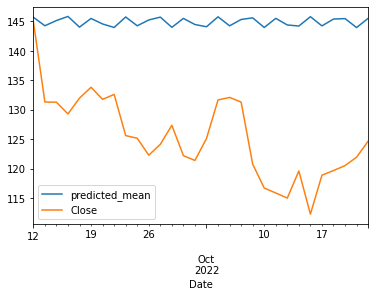

In [41]:
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [42]:
model2 = sm.tsa.arima.ARIMA(df['Close'], order=(4,1,4))
model2 = model2.fit()
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-17,115.180000,119.480003,115.169998,118.879997,118.879997,58077400
2022-10-18,123.440002,124.919998,116.180000,119.669998,119.669998,65936200
2022-10-19,118.790001,123.500000,118.339996,120.510002,120.510002,52313100
2022-10-20,121.129997,127.690002,121.050003,121.940002,121.940002,65239800
2022-10-21,120.980003,124.980003,118.870003,124.660004,124.660004,60893800


In [59]:
index_future_dates= [0,1,2,3,4,5,6,7,8,9]
pred = model2.predict(start=len(df), end=len(df)+9, typ='levels').rename("Close")
data2 = pred.to_frame()
data2['Index'] = index_future_dates
data2.set_index('Index')

,Close
Index,
0,125.149167
1,124.031078
2,124.409274
3,123.726185
4,124.594387
5,124.596775
6,124.843609
7,124.637414
8,124.088633


In [60]:
from google.colab import files

data2.to_csv('Tan Sher Yew_Impl_2.csv', encoding = 'utf-8-sig') 
files.download('Tan Sher Yew_Impl_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>